- Ref
  - https://qiita.com/opticont/items/04a5b4ff41483966987f
  - https://qiita.com/ganyariya/items/ae5a38a3537b06bd3842

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Ackley_2d(x, y):
    ret = -20 * np.exp(-0.2 * np.sqrt(1/2 * (x**2 + y**2))) - np.exp(1/2 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + 20 + np.e
    return ret 

In [3]:
def vizualize_mpl(objective_func, X=None, Y=None):
    '''
    可視化用

    Args:
        objective_func : 目的関数
        X (np.ndarray): 個体たちのx座標
        Y (np.ndarray): 個体たちのy座標
    '''
    x_ = np.linspace(-5, 5, 1000)
    y_ = np.linspace(-5, 5, 1000)
    x, y = np.meshgrid(x_, y_)
    z = objective_func(x, y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')
    ax.plot_wireframe(x, y, z, linewidths=0.6, alpha=0.5, color='gray')
    if (X is not None) and (Y is not None):
        ax.scatter(X, Y, objective_func(X, Y))
    plt.show()


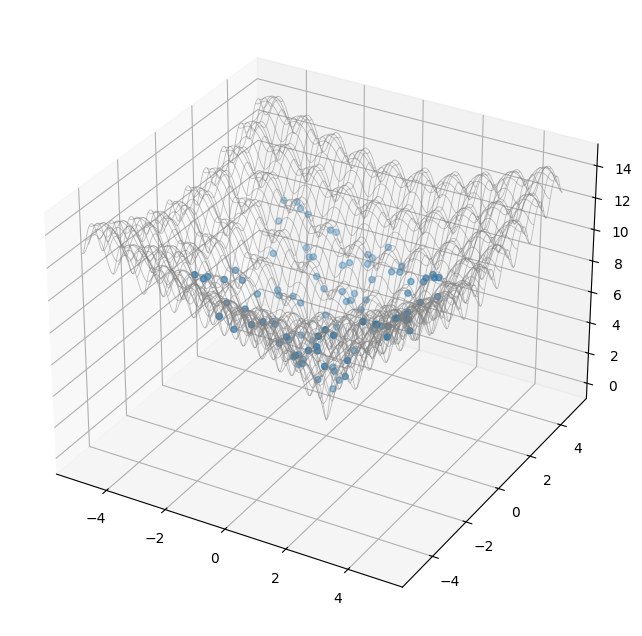

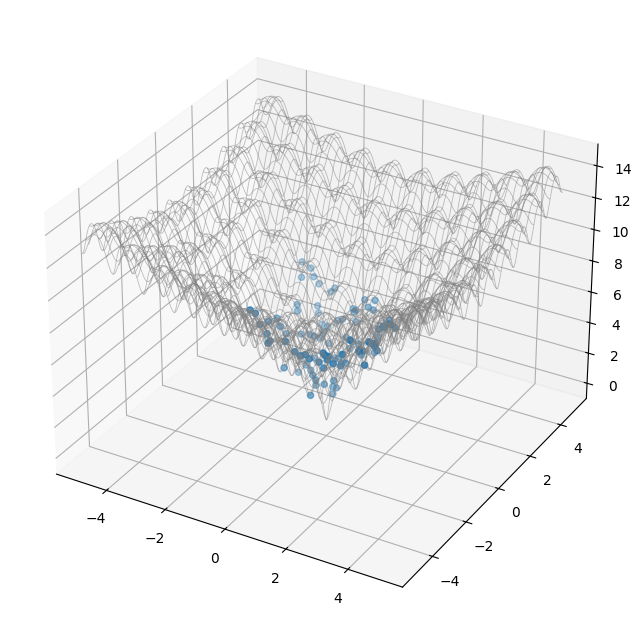

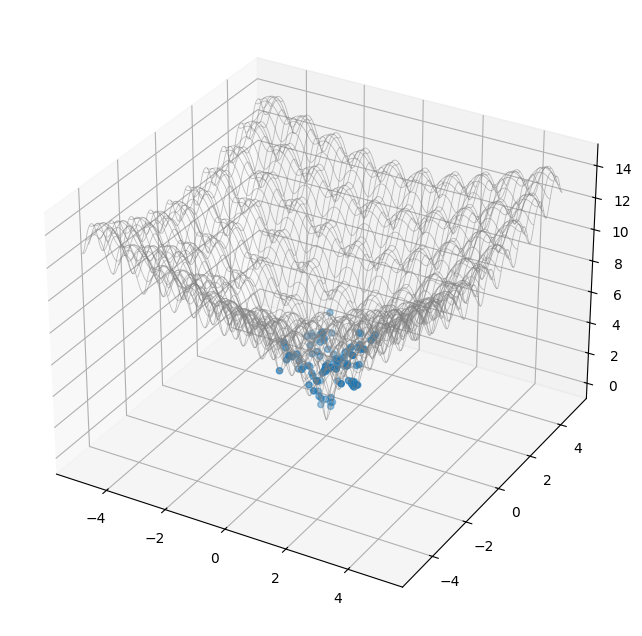

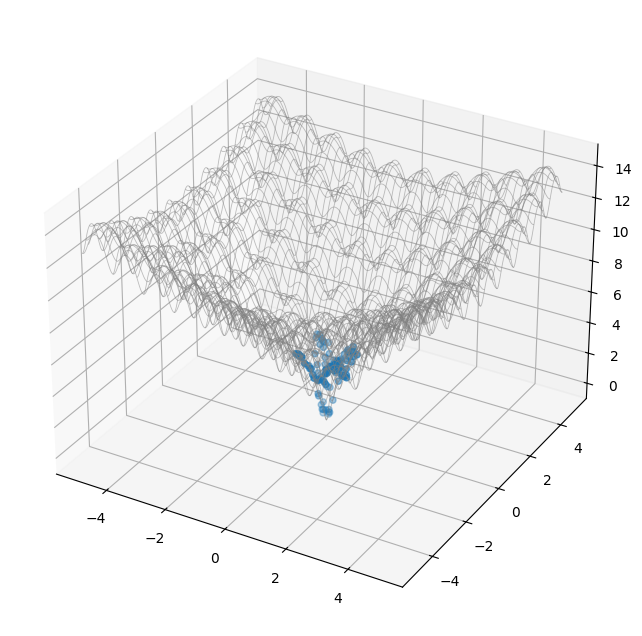

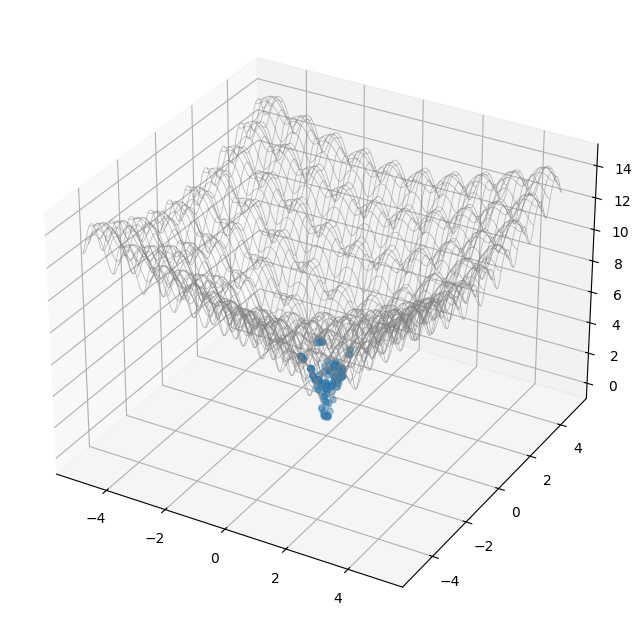

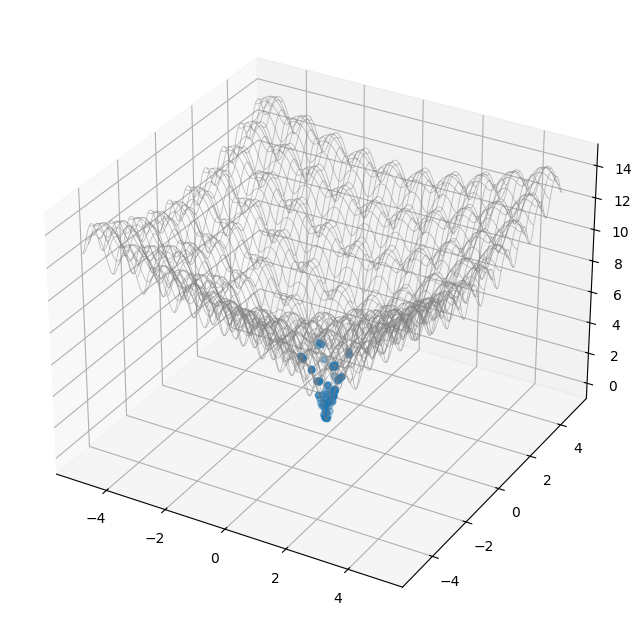

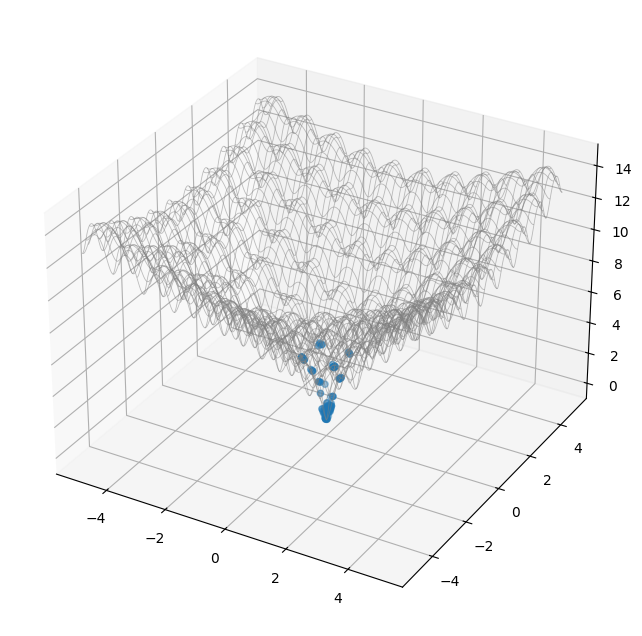

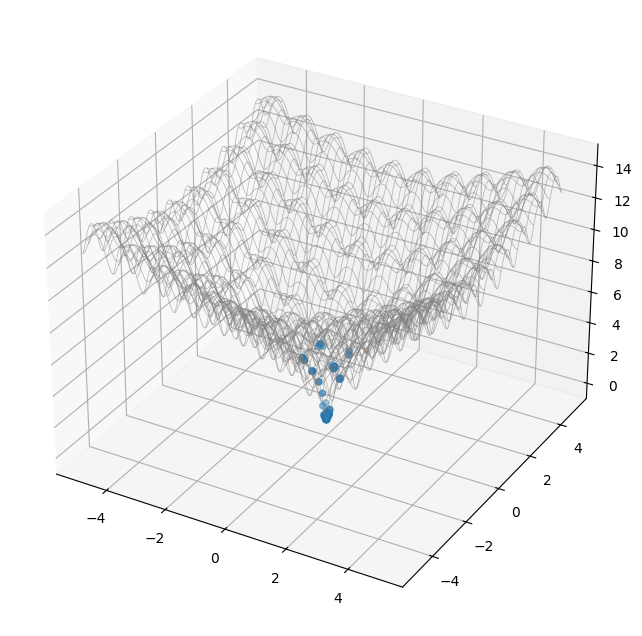

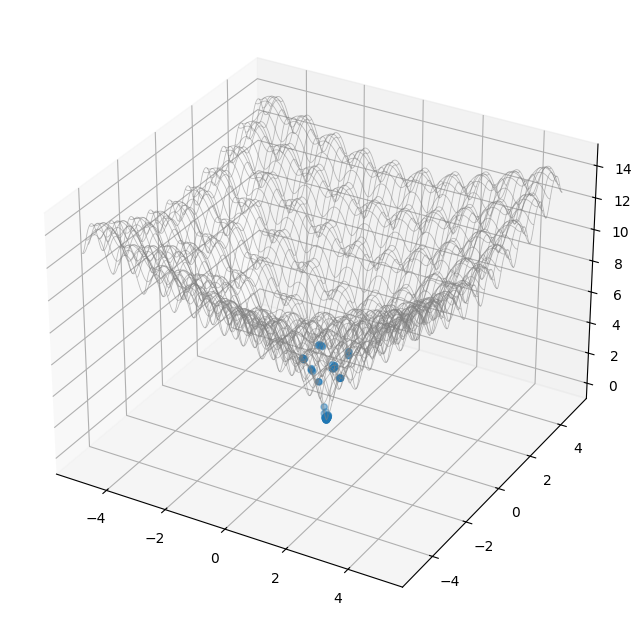

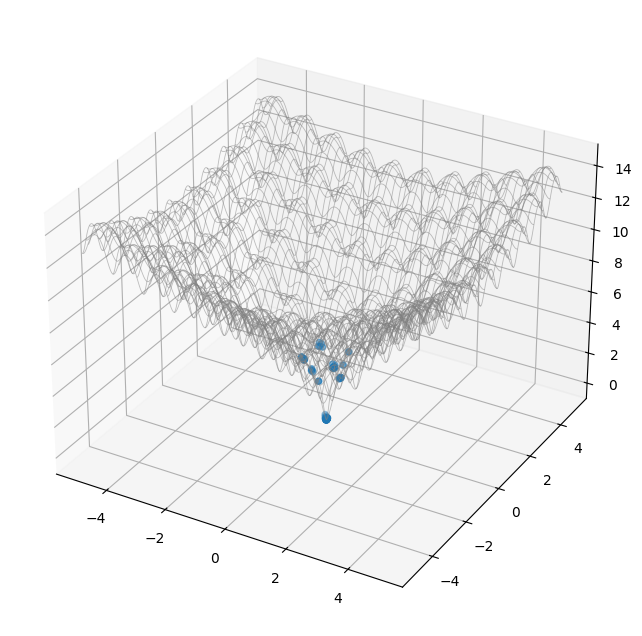

[-0.00170508 -0.00108248  0.0058211 ]


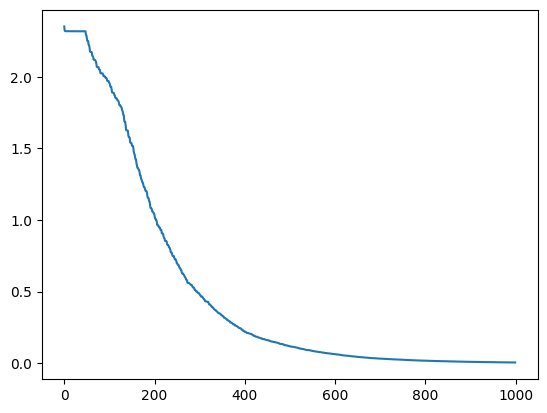

In [4]:
# PSOの実装

# 粒子数
N = 100

# 最大イテレーション回数
max_iter = 1000

X = 6*np.random.rand(2, N) - 3*np.ones((2, N)) # -3 〜 3の間の一様分布
V = 0.2*np.random.rand(2, N) - 0.1*np.ones((2, N)) # -0.1 〜 0.1の間の一様分布

pbest = np.zeros((3, N))
pbest[0:2, :] = X

Zinit = Ackley_2d(pbest[0, :], pbest[1, :])
pbest[2, :] = Zinit

#初期化した粒子の内で最も良いものをgbestとして格納
ap = np.argmin(Zinit)
gbest = np.array([pbest[0, ap], pbest[1, ap], Ackley_2d(pbest[0, ap],pbest[1, ap])])

w = 0.1
c1 = 0.01
c2 = 0.01

res = np.zeros((2, max_iter))

for i in range(max_iter):
    # N個の粒子に亘るloop
    for j in range(N):
        # 位置の更新
        X[:, j] = X[:, j] + V[:, j]
        # 速度の更新
        V[:, j] = w*V[:, j] + c1*np.random.rand(1)*(pbest[0:2, j]-X[:, j]) + c1*np.random.rand(1)*(gbest[0:2]-X[:, j])

        if Ackley_2d(X[0, j], X[1, j]) < pbest[2, j]:
            pbest[0:2, j] = X[:, j]
            pbest[2, j] = Ackley_2d(X[0, j], X[1, j])

    # N個の粒子の内で最適なものを取得し，過去の最適値と比較する
    a = np.argmin(pbest[2, :])
    if pbest[2, a] < gbest[2]:
        gbest[0:2] = pbest[0:2, a]
        gbest[2] = Ackley_2d(gbest[0], gbest[1])

    # イテレーション回数iとその際の最適値を格納
    res[:, i] = np.array([i, gbest[2]])
    if i % 100 == 0:
        # plt.plot(res[0, 0:i], res[1, 0:i])
        # plt.show()
        vizualize_mpl(Ackley_2d, X[0], X[1])

plt.plot(res[0,:],res[1,:])
print(gbest)

In [5]:
# # https://cnc-selfbuild.blogspot.com/2018/04/jupyter-notebookjupyterlab-matplotlib.html

# %matplotlib inline

# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.animation as animation
# from IPython.display import HTML

# fig = plt.figure()
# x = np.linspace(-5,5,100)
# y = np.sin(x)

# ims = [] # 動画要素を格納するリスト

# for i in range(len(x)):
#     ln = plt.plot(x,y, 'b--')     # 動かない線
#     pt = plt.plot(x[i],y[i],'ro') # 移動する点
#     ims.append(ln + pt)

# ani = animation.ArtistAnimation(fig,ims,interval=50) # アニメ関数

# # ani.save("test.gif", writer = "imagemagick") # GIF保存

# plt.close() #余計なウィンドウがでた場合消す

# # HTML(ani.to_html5_video()) # HTML5 Videoで表示
# HTML(ani.to_jshtml())    # Javascript HTMLで表示